# Import Library

In [1]:
!pip install sastrawi
!pip install nltk
!pip install gensim
!pip install tensorflow
!pip install keras
!pip install vaderSentiment
!pip install num2words
 #menggunakan mpstemmer untuk mempercepat hasil stemming
!pip install python-Levenshtein
!pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git

  Cloning https://github.com/ariaghora/mpstemmer.git to /tmp/pip-req-build-ryg433y7
  Running command git clone --filter=blob:none --quiet https://github.com/ariaghora/mpstemmer.git /tmp/pip-req-build-ryg433y7
  Resolved https://github.com/ariaghora/mpstemmer.git to commit 25a5fd923af163a7eac3a5ec976984156ca8fa8b
  Preparing metadata (setup.py) ... done


In [2]:
import pandas as pd # Pustaka untuk membuat dataframe
import numpy as np # pustaka untuk pengolahan angka
import matplotlib.pyplot as plt # Pustaka untuk visualisasi
import seaborn as sns # Pustaka untuk visualisasi

import re # Pustaka regex
import string #Pustaka untuk manipulasi string
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
from nltk.tokenize import word_tokenize # Tokenisasi teks
from nltk.corpus import stopwords # Daftar kata-kata berhenti dalam teks
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory  # Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory  # Menghapus kata-kata berhenti dalam bahasa Indonesia
from wordcloud import WordCloud  # Membuat visualisasi berbentuk awan kata (word cloud) dari teks
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # Labelling menggunakan VADER
from num2words import num2words # Pustaka untuk merubah angka menjadi kata

In [3]:
# Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata yang tidak memiliki makna (stopwords)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Data Loading

In [4]:
# Memuat dataset
df = pd.read_csv("https://raw.githubusercontent.com/elvinojunior/dicoding_proyek_analisis_sentimen/refs/heads/main/shopee_driver_review.csv")
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e7627ef4-9425-4a09-bd23-f4279a1e6d19,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saya sangat berharap agar order paket sameday ...,1,42,7.38.0,2025-04-07 02:07:44,"Hi Kak Sauw, maaf atas kendalanya, mimin infok...",2022-04-13 14:11:59,7.38.0
1,f295b3a4-355c-4019-8f6d-64061215f89f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"udah pindah alih pun argo nya makin main², jar...",1,160,7.38.0,2025-04-02 03:50:31,"Hi kak ucy fzn, maaf ya sudah buat kmu gak nya...",2025-04-02 04:27:53,7.38.0
2,469240f5-e587-4f21-b303-2cb56e11f6ca,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,1) Pesanan gabungan sangat merugikan. Pesanan ...,1,317,7.32.1,2025-03-13 05:39:55,NaN,NaN,7.32.1
3,72f6ac6b-ef22-4aef-86ad-5c7c26897347,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"uhh aplikasinya masih banyak sekali bug, saya ...",1,40,7.38.0,2025-04-06 09:48:23,"Hai kak Sky To Heaven , maaf buat kamu ga nyam...",2025-04-06 10:07:07,7.38.0
4,4b4293cc-6039-4072-931b-8e66dd60747a,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,berkali kali disarankan update aplikasi tapi t...,2,5,7.35.0,2025-04-08 12:50:33,"Hi kak, Mohon maaf atas ketidaknyamannya. Bila...",2023-12-16 02:21:47,7.35.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,4512d4dd-aa6f-4773-93a5-6b3616cd6bfa,Abdul Latief,https://play-lh.googleusercontent.com/a-/ALV-U...,Sejak tanggal 16 saya melakukan pengajuan penc...,1,31,1.20.0,2021-07-20 10:31:50,NaN,NaN,1.20.0
9996,7c563851-3ad8-4391-9f81-afb0a9a8637e,Khanza Shakayla,https://play-lh.googleusercontent.com/a/ACg8oc...,Orderan nya susah di cari' aktif dr pagi - sor...,1,2,1.29.2,2021-11-12 12:55:59,NaN,NaN,1.29.2
9997,6496e15b-d40f-4157-aa32-7470621dfc10,Dudung Dadang,https://play-lh.googleusercontent.com/a/ACg8oc...,"Saya sudah ajukan upaya hukum soal PT ini , ti...",1,0,NaN,2023-03-23 08:12:36,NaN,NaN,NaN
9998,5d6d63f8-190a-46a7-a6e1-2c7ad5396019,Asep Aryadi,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasi sering bug sering elor mohon diperbai...,1,2,6.67.1,2023-11-10 12:05:39,"Hai ka, maaf ya untuk kendala nya, terkait ken...",2023-11-10 14:34:46,6.67.1


In [5]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              10000 non-null  object
 1   userName              10000 non-null  object
 2   userImage             10000 non-null  object
 3   content               10000 non-null  object
 4   score                 10000 non-null  int64 
 5   thumbsUpCount         10000 non-null  int64 
 6   reviewCreatedVersion  8113 non-null   object
 7   at                    10000 non-null  object
 8   replyContent          5869 non-null   object
 9   repliedAt             5869 non-null   object
 10  appVersion            8113 non-null   object
dtypes: int64(2), object(9)
memory usage: 859.5+ KB


Dataset ini berisi 10.000 ulasan pengguna terhadap Aplikasi 'ShopeeFood Driver' di platform Playstore. Tujuan utama dari dataset ini adalah untuk menganalisis sentimen pengguna terhadap aplikasi berdasarkan ulasan teks (content) dan skor rating (score) yang diberikan.

# Data Cleaning

In [6]:
# membuang kolom yang tidak memiliki fungsi untuk model
columns= ['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt','appVersion']
df.drop(columns, axis=1, inplace=True)

Seperti yang sudah saya jelaskan saya hanya menggunakan kolom ulasan teks dan skor rating (score) untuk analisa sentimen saya. maka kolom lainnya akan saya hapus

In [7]:
# Cek jumlah missing values
print(df.isna().sum(),'\n')
# Cek duplicate values
print('Jumlah duplikasi data : ',df.duplicated().sum())

content    0
score      0
dtype: int64 

Jumlah duplikasi data :  0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  10000 non-null  object
 1   score    10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


Tidak ada Missing Values (nilai yang kosong) dan Duplikasi data pada dataset. Jadi mari kita lanjut ke tahap berikutnya yaitu Text Preprocessing

# Text Preprocessing

## Casefolding dan Text Cleaning

In [9]:
# Case folding
def casefolding(text):
    text = text.lower()
    return text

# Text Cleaning
def cleaning(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # hapus mention
    text = re.sub(r'#[A-Za-z0-9_]+', '', text)  # hapus hashtag
    text = re.sub(r'http\S+', '', text)         # hapus URL

    # Ubah angka ke teks
    def convert_number_to_words(match):
        number = int(match.group())
        return num2words(number, lang='id')  # Bahasa Indonesia

    text = re.sub(r'\d+', convert_number_to_words, text)
    text = text.replace('\n', ' ')  # hapus baris baru
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = text.translate(str.maketrans('', '', string.punctuation))  # hapus tanda baca
    text = text.strip() # menghapus karakter spasi
    return text

## Tokenisasi dan filter stopword

In [10]:
# Tokenisasi
def tokenizing(text):
    text = word_tokenize(text)
    return text

# Menghapus stopwords
def filtering(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','sih','sii','ku',"di","ga","ya","gaa","loh","kah","dong","woi","woii","woy","kan","deh","yang","yg","emang","memang"])
    filtered = []
    for txt in text:
        if txt.lower() not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

## Normalisasi kata

In [11]:
# Membuat dictionary kalimat slang yang dipakai oleh driver
slang_dict = {
    "gua" : "aku",
    "lu" : "anda",
    "gk": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "gak": "tidak",
    "dpt": "dapat",
    "udh": "sudah",
    "sdh": "sudah",
    "bgt": "banget",
    "dr": "dari",
    "aja": "saja",
    "tp": "tapi",
    "jd": "jadi",
    "blm": "belum",
    "yg": "yang",
    "sm": "sama",
    "trs": "terus",
    "krn": "karena",
    "cs" : "customer",
    "pembeli" : "customer",
    "cod": "bayar ditempat",
    "lelet": "lambat",
    "lemot": "lambat",
    "lebay": "berlebihan",
    "mao": "mau",
    "masukin": "masukkan",
    "ngambil": "mengambil",
    "nganggur": "tidak punya pekerjaan",
    "ngapah": "kenapa",
    "ngaret": "terlambat",
    "ngasih": "memberikan",
    "suspend" : "penangguhan",
    "saspen" : "penangguhan",
    "taspen" : "penangguhan",
    "pinalti" : "pelanggaran",
    "bobrok" : "rusak",
    "argo" : "tarif",
    "argonya" : "tarif",
    "apk" : "aplikasi",
    "jancok" : "jelek",
    "jancoek" : "jelek",
    "aplikasinya": "aplikasi",
    "aplikator" : "aplikasi",
    "blm": "belum",
    "bnyk": "banyak",
    "bbrp": "beberapa",
    "kyk": "seperti",
    "knp": "kenapa",
    "ktnya": "katanya",
    "lg": "lagi",
    "lgsng": "langsung",
    "mending": "lebih baik",
    "org": "orang",
    "pdhl": "padahal",
    "sampe": "sampai",
    "udh": "sudah",
    "ujung2nya": "akhirnya",
    "yg": "yang",
    "zonk": "buruk",
    "orderan": "pesanan",
    "dapet": "dapat",
    "nyender": "menunggu",
    "ngetem": "berhenti menunggu pesanan",
    "ngebit": "mencari orderan",
    "boncos": "rugi",
    "gacor": "ramai orderan",
    "gagu": "tidak ada orderan",
    "gas": "jalan",
    "ngaret": "terlambat",
    "tarikan": "pesanan",
    "resto": "restoran",
    "ngerest": "beristirahat",
    "shopeepay": "dompet digital",
    "dompet digital": "e-wallet",
    "pelanggan": "customer",
    "bintang satu": "ulasan buruk",
    "bintang lima": "ulasan bagus",
    "suspend": "penangguhan",
    "akun gue": "akun saya",
    "diblok": "blokir",
    "rejeki": "pendapatan",
    "zonk": "buruk",
    "nolak": "menolak",
    "pickup" : "mengambil pesanan",
    "drop" : "mengantar pesanan",
    "ngecas": "mengisi daya",
    "pencairan": "penarikan saldo",
    "rating": "penilaian",
    "penilaian": "ulasan",
    "gaji": "penghasilan",
    "point": "poin",
    "narik": "mengemudi mencari order",
    "ngirim": "mengirim",
    "saldo": "uang di aplikasi",
    "upgrade": "peningkatan",
    "ongkir" : "ongkos kirim",
    "satset": "cepat",
    "cancel" : "pembatalan",
    "cansel" : "pembatalan",
    "random" : "acak",
    "tlg": "tolong",
    "crazy" : "gila",
    "fake" : "palsu",
    "gps" : "petunjuk arah",
    "fek" : "palsu"
}
# fungsi untuk normalisasi kata slang
def normalize_slang(tokens):
    return [slang_dict.get(word.lower(), word) for word in tokens]

## Stemming dan menggabungkan text

In [12]:
# def stemmingText(text):
#     # Membuat objek stemmer
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     # Memecah teks menjadi daftar kata
#     words = text.split()
#     # Menerapkan stemming pada setiap kata dalam daftar
#     stemmed_words = [stemmer.stem(word) for word in words]
#     # Menggabungkan kata-kata yang telah distem
#     stemmed_text = ' '.join(stemmed_words)
#     return stemmed_text

from mpstemmer import MPStemmer #impor pustaka mpstemmer
from functools import lru_cache #menggunakan metode cache supaya kata yang sudah distem tidak perlu diulang

# fungsi MPStemmer menggunakan cache sebesar 10.000 kata
stemmer = MPStemmer()
@lru_cache(maxsize=10000)
def cached_stem(word):
    return stemmer.stem(word)

def stemmingText(text):
    stemmed_words = [cached_stem(word) for word in text]
    return stemmed_words

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

## Menjalankan pipeline text preprocessing

In [13]:
# Mengubah huruf dalam teks menjadi huruf kecil
df['clean_content'] = df['content'].apply(casefolding)

In [14]:
# Membersihkan teks
df['clean_content'] = df['clean_content'].apply(cleaning)

In [15]:
# Memecah teks menjadi token (list kata)
df['clean_content'] = df['clean_content'].apply(tokenizing)

In [16]:
# Menghapus stopwords
df['clean_content'] = df['clean_content'].apply(filtering)

In [17]:
# Mengganti kata-kata slang dengan kata-kata standar
df['clean_content'] = df['clean_content'].apply(normalize_slang)

In [18]:
# Melakukan stemming
df['clean_content'] = df['clean_content'].apply(stemmingText)

In [19]:
# Menggabungkan token-token menjadi kalimat
df['clean_content'] = df['clean_content'].apply(toSentence)

In [20]:
df

,content,score,clean_content
0,Saya sangat berharap agar order paket sameday ...,1,harap order paket sameday maksimal antar delap...
1,"udah pindah alih pun argo nya makin main², jar...",1,udah pindah alih tarif main² jarak tarif siksa...
2,1) Pesanan gabungan sangat merugikan. Pesanan ...,1,pesan gabung rugi pesan ambil jarak tempuh but...
3,"uhh aplikasinya masih banyak sekali bug, saya ...",1,uhh aplikasi bug temu notifikasi pesan masuk m...
4,berkali kali disarankan update aplikasi tapi t...,2,kali kali saran update aplikasi tetap saja apl...
...,...,...,...
9995,Sejak tanggal 16 saya melakukan pengajuan penc...,1,tanggal enam belas aju penarikan saldo dompet ...
9996,Orderan nya susah di cari' aktif dr pagi - sor...,1,pesan susah cari aktif dari pagi sore cm dapat...
9997,"Saya sudah ajukan upaya hukum soal PT ini , ti...",1,aju upaya hukum pt tinggal tunggu proses anehh...
9998,Aplikasi sering bug sering elor mohon diperbai...,1,aplikasi bug elor mohon baik driver dijalan su...


Setelah melalui Text Preprocessing, dapat kita lihat pada kolom 'clean_content' bahwa hasil ulasan menjadi huruf kecil semua tanpa ada angka, serta kalimat stopword sudah di hapus

# Labelling

## Polaritas text berdasarkan VADER

In [21]:
analyzer = SentimentIntensityAnalyzer()

# Fungsi untuk memberi label dari skor VADER
def get_vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positif'
    elif score <= -0.05:
        return 'negatif'
    else:
        return 'netral'

# Terapkan ke kolom teks bersih
df['vader_sentiment'] = df['clean_content'].apply(get_vader_sentiment)
# menampilkan distribusi
print(df['vader_sentiment'].value_counts())

vader_sentiment
netral     8180
negatif    1006
positif     814
Name: count, dtype: int64


Berdasarkan Vader kita melihat bahwa hasil ulasan di dominasi oleh netral, lalu negatif, dan hanya sedikit yang positif.

Sesuai dengan review dari platform playstore yang mendapat 3.1(netral) dari skala 1(negatif) - skala 5 (positif).

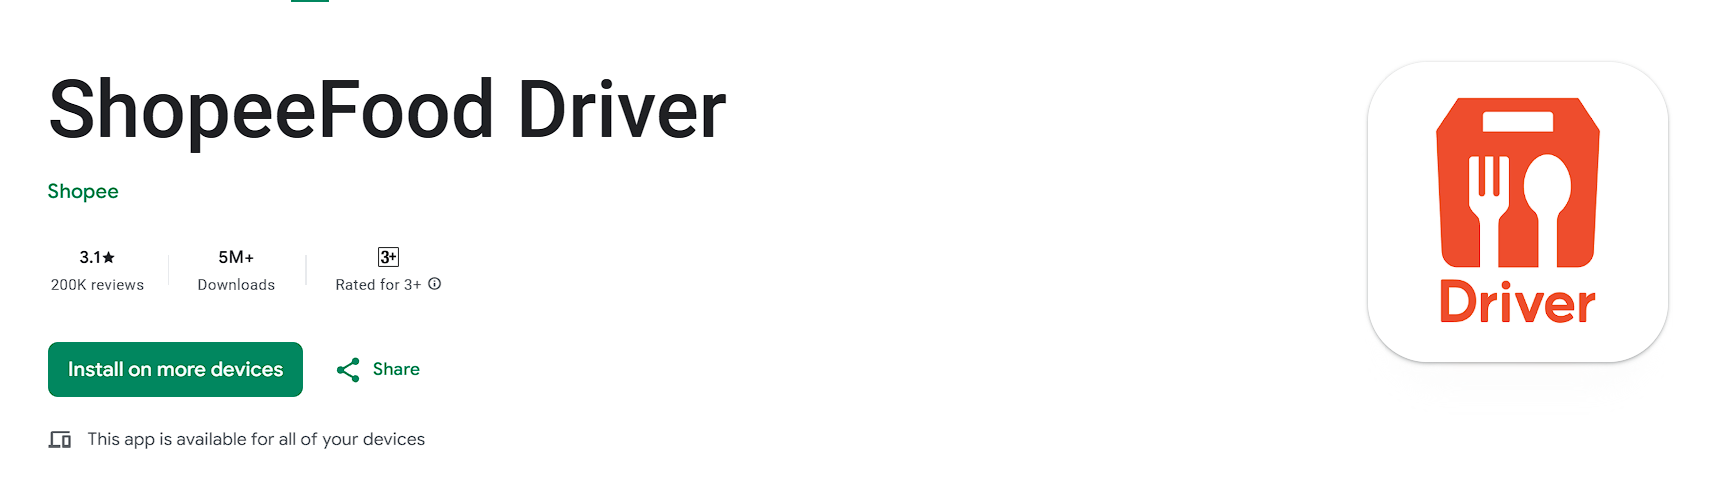


In [22]:
# distribusi lebih detail
df[['content', 'vader_sentiment']].head()

,content,vader_sentiment
0,Saya sangat berharap agar order paket sameday ...,positif
1,"udah pindah alih pun argo nya makin main², jar...",netral
2,1) Pesanan gabungan sangat merugikan. Pesanan ...,positif
3,"uhh aplikasinya masih banyak sekali bug, saya ...",netral
4,berkali kali disarankan update aplikasi tapi t...,negatif


## Visualisasi WordCloud

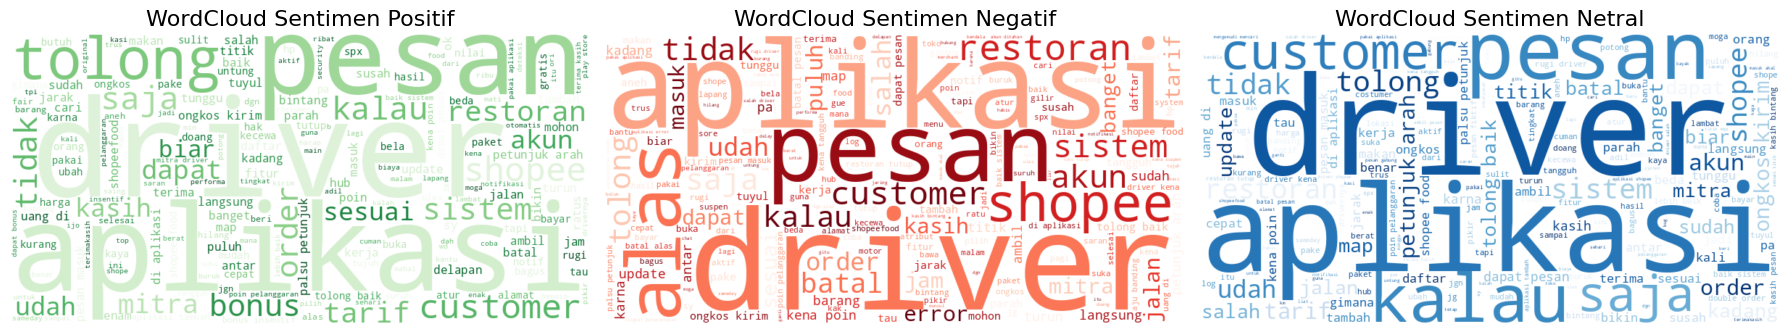

In [23]:
# Gabungkan teks berdasarkan label sentimen
sentiment_texts = {
    sentiment: ' '.join(df[df['vader_sentiment'] == sentiment]['clean_content'])
    for sentiment in ['positif', 'negatif', 'netral']
}

# Membuat wordcloud dengan grid (1x3)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 baris, 3 kolom
colors = {'positif': 'Greens', 'negatif': 'Reds', 'netral': 'Blues'}

for ax, (sentiment, text) in zip(axes, sentiment_texts.items()):
    wc = WordCloud(
        width=800, height=400,
        background_color='white',
        colormap=colors[sentiment],
        max_words=200
    ).generate(text)

    ax.imshow(wc, interpolation='bilinear')
    ax.set_title(f'WordCloud Sentimen {sentiment.capitalize()}', fontsize=16)
    ax.axis('off')

plt.tight_layout()
plt.show()

1. WordCloud Sentimen Positif
Kata besar = sering muncul. Contoh:

  > aplikasi, driver, tolong, pesan, restoran, bonus, tarif

Meskipun kata seperti "tolong" terlihat netral atau bahkan negatif dalam konteks tertentu, dalam konteks ini bisa saja digunakan secara positif, misal:

"Tolong pertahankan sistem insentif yang bagus."

2. WordCloud Sentimen Negatif

 > Kata besar: aplikasi, driver, pesan, shopee, sistem, batal, error, akun

rincian :

Masalah update → tidak ada pembaruan yang memudahkan mitra

Masalah login → masuk, akun

Masalah lokasi → titik, petunjuk arah

Aplikasi bermasalah → error, salah, sistem

3. WordCloud Sentimen Netral
Review yang tidak terlalu memuji atau mengeluh — mungkin sekadar informasi, saran, atau keluhan pribadi.

 > Kata besar: aplikasi, driver, pesan, tarif, ongkos kirim


# Feature Extraction + Modelling

## Skema 1 : SVM,    Ekstraksi Fitur: TF-IDF,    Pembagian Data: 80/20

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score

# Ekstraksi fitur TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_content'])

# Label target
y = df['vader_sentiment']

# Pembagian data 80/20
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)

# Model SVM
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluasi
print("SVM + TF-IDF")
print(classification_report(y_test, y_pred_svm))
print("Akurasi:", accuracy_score(y_test, y_pred_svm))

SVM + TF-IDF
              precision    recall  f1-score   support

     negatif       0.99      0.76      0.86       201
      netral       0.94      1.00      0.97      1636
     positif       0.96      0.66      0.78       163

    accuracy                           0.95      2000
   macro avg       0.96      0.81      0.87      2000
weighted avg       0.95      0.95      0.94      2000

Akurasi: 0.947


* Model ini sangat baik secara umum (akurasi hampir 95%).

* Tapi model kurang optimal mendeteksi review negatif dan positif pada sisi recall(positif: 0.66, dan negatif: 0.76).

* Mungkin karena data netral terlalu dominan (imbalance)

bisa dipertimbangkan untuk melakukan:

1. Gunakan oversampling (misal SMOTE)

2. Atau class weight balance di SVM

## Skema 2 : Random Forest,    Ekstraksi Fitur: Word2Vec,    Pembagian Data: 70/30

In [25]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Training Word2Vec dari token
df['token'] = df['clean_content'].apply(lambda x: x.split())
tokenized = df['token']
w2v_model = Word2Vec(sentences=tokenized, vector_size=100, window=5, min_count=2, workers=4)

# Fungsi rata-rata Word2Vec
def vectorize(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Vektorisasi
X_w2v = np.array([vectorize(tokens, w2v_model) for tokens in tokenized])

# Label target
y = df['vader_sentiment']

# Split 80/20
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, test_size=0.3, random_state=42, stratify=y)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("Random Forest + Word2Vec")
print(classification_report(y_test, y_pred_rf))
print("Akurasi:", accuracy_score(y_test, y_pred_rf))

Random Forest + Word2Vec
              precision    recall  f1-score   support

     negatif       0.56      0.02      0.03       302
      netral       0.82      1.00      0.90      2454
     positif       0.50      0.00      0.01       244

    accuracy                           0.82      3000
   macro avg       0.62      0.34      0.31      3000
weighted avg       0.77      0.82      0.74      3000

Akurasi: 0.8183333333333334


Hasil evaluasi model Random Forest + Word2Vec ini menunjukkan performa yang sangat tidak seimbang antar kelas, meskipun akurasinya terlihat tinggi yaitu 0.818, tapi kenyataannya model hanya selalu menebak "netral" karena itu yang paling banyak.

Ini menyebabkan akurasi menipu karena tidak mencerminkan kualitas deteksi kelas negatif dan positif.

## Skema 3 : LSTM, Ekstraksi Fitur: Tokenizer, Pembagian Data: 80/20

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np

# 1. Siapkan data
texts = df['clean_content'].values
labels = df['vader_sentiment'].values

# 2. Tokenisasi
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

# 3. Padding
maxlen = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=maxlen, padding='post')

# 4. Label encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)  # konversi ke angka
y = to_categorical(y)  # konversi ke one-hot encoding

# 5. Split data 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Model LSTM
vocab_size = len(tokenizer.word_index) + 1  # +1 untuk padding token

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=maxlen))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # 3 kelas: positif, negatif, netral

# 7. Kompilasi model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 8. Pelatihan
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


250/250 ━━━━━━━━━━━━━━━━━━━━ 21s 71ms/step - accuracy: 0.7870 - loss: 0.7098 - val_accuracy: 0.8230 - val_loss: 0.5922
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.8179 - loss: 0.6307 - val_accuracy: 0.8230 - val_loss: 0.5955
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.8263 - loss: 0.6047 - val_accuracy: 0.8225 - val_loss: 0.5906
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 74ms/step - accuracy: 0.8190 - loss: 0.6172 - val_accuracy: 0.8230 - val_loss: 0.5851
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - accuracy: 0.8163 - loss: 0.6113 - val_accuracy: 0.8230 - val_loss: 0.6321


* val_accuracy lebih tinggi dari training accuracy → bisa berarti model kamu:

* Regularisasi (dropout) berjalan baik :
Accuracy > 80% untuk klasifikasi multi-kelas 3 label (positif, netral, negatif) sudah sangat bagus terutama apalagi distribusi label yang tidak seimbang.

## Conclusion

Berdasarkan 3 Skema diatas mendapat perolehan score accuracy yaitu :
* SVM + TF-IDF + 80/20: Akurasi: 0.947
* RF + Word2Vec + 70/30: Akurasi : 0.818
* LSTM + Tokenizer + 80/20 : Validasi Akurasi mencapai 0.823

Maka mari kita simpan untuk performa model terbaik yaitu SVM + TF-IDF (Skema 1)

# Save models

Model SVM + TF-IDF, dan ini cocok disimpan menggunakan 'pickle' karena baik TfidfVectorizer maupun LinearSVC berasal dari scikit-learn.

In [27]:
import pickle

# Simpan vectorizer dan model dalam satu file (paket)
with open('svm_tfidf_model.pkl', 'wb') as f:
    pickle.dump((tfidf, svm_model), f)


# Inference

In [29]:
# Load vectorizer dan model
with open('svm_tfidf_model.pkl', 'rb') as f:
    tfidf_loaded, svm_model_loaded = pickle.load(f)

# Contoh prediksi ulang
text_baru = [
    "bonus besar dan tarif ongkos kirim sesuai",   # positif
    "aplikasi sering mengalami error",            # negatif
    "saran saya aplikasi diperbarui",             # netral
]

X_new = tfidf_loaded.transform(text_baru)
prediksi = svm_model_loaded.predict(X_new)

print("Prediksi:", prediksi)

Prediksi: ['positif' 'negatif' 'netral']
